In [1]:
import pandas as pd
import sys
sys.path.append(r'C:\Users\HwijunKwon\github\recipe\models')
import svd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [37]:
rec= pd.read_csv(r'C:\Users\HwijunKwon\github\recipe\models\data\RecipeData.csv')

In [11]:
import db
final = db.oracle2df('FINAL_RECIPE')

In [219]:
matrix = pd.read_csv(r'../models/matrix/food_matrix_2001.csv')
matrix = matrix.loc[matrix.recipe_title.notna()].copy() # NA 제거
matrix.index = range(len(matrix)) # 인덱스 초기화


In [183]:
import numpy as np
import matplotlib.pyplot as plt
def draw_recipe_recommend(matrix, rec_num, ingd_name):


    # matrix : 2000 * 995 -> rec_vec = 2000*100, ingd_vec => 995*100
    rec_title, ingd_list, rec_vec, ingd_vec = svd.matrix_decomposition(matrix)

    ingd_idx = ingd_list.index(ingd_name) # 삼겹살 -> 삼겹살의 index
    target_inge = ingd_vec[ingd_idx] # 삼결살의 100차원 벡터


    myfood = rec_vec[rec_num] # 내가 원하는 음식의 벡터                          
    myfood_new  = myfood - 1* target_inge

    sim_before = cosine_similarity([myfood], rec_vec)[0] # 식재료 제거하기 전
    sim_after = cosine_similarity([myfood_new], rec_vec)[0] #식재료 제거한 후
     # 차원 맞춰주기
    sim_idx =  np.argsort(sim_before)[::-1][:5] # 기존 레시피와 유사한 레시피
    recommend_idx = np.argsort(sim_after)[::-1][:5] # 식재료 정보를 반영한 레시피

    recommend_list_before =  [rec_title[i] for i in sim_idx]
    recommend_list_after = [rec_title[i] for i in recommend_idx]
    print(f"선택 음식 : {rec_title[rec_num]} - 먹으면 안돼는 식재료 : {ingd_name}")
    return recommend_list_before, recommend_list_after 

draw_recipe_recommend(matrix, 98, '돼지고기')


1968개의 레시피, 632개의 식재료 -> 100차원으로 재표현 완료
선택 음식 : 한정식집의 쫀득한 연근조림만들기 - 먹으면 안돼는 식재료 : 돼지고기


(['한정식집의 쫀득한 연근조림만들기',
  '맛있는 전통 간식 : 들깨강정 / GANGJEONG with Perilla seeds',
  '쇠고기 감자국 맛있게 만드는 법',
  '문어 꽈리고추 조림',
  '집밥백선생 고추장아찌무침. 백종원레시피. 밑반찬. 고추장아찌 활용.'],
 ['손쉽게 만드는 김치국수 따끈하게 만들어 먹어요~',
  '한정식집의 쫀득한 연근조림만들기',
  '딸아이가 먹고 싶다는 굴 국밥과 돼지고기 수육',
  '#돼지고기요리 #메추리알요리 #돼지고기메추리알조림만들기 #고소하고 단짠단짠한 돼지고기메추리알조림!!',
  '쇠고기 감자국 맛있게 만드는 법'])

In [220]:
def draw_recipe_recommend(matrix, rec_num, ingd_name):


    # matrix : 2000 * 995 -> rec_vec = 2000*100, ingd_vec => 995*100
    rec_title, ingd_list, rec_vec, ingd_vec = svd.matrix_decomposition(matrix)

    tsne = TSNE(n_components= 2)
    reduced_vec = tsne.fit_transform(rec_vec)


    # 영양소 SVD로 레시피 표현 

    # RNN으로 rec_vec (ex) 50차원을 표현) <-> DOC2VEC으로 표현
    # SVD vector(x100)와 RNN Vector(x50) (Concat) -> Concat Vector (N * 150)
    # []
    # []

    # 



    # 전체 그림 그리기
    plt.scatter(reduced_vec[:, 0], reduced_vec[:, 1], c = 'grey')
    # 현재 기준 레시피 점
    plt.scatter(reduced_vec[rec_num, 0], reduced_vec[rec_num, 1], c= 'red')
    plt.annotate(rec_title[rec_num], reduced_vec[rec_num], size = 10)

    ingd_idx = ingd_list.index(ingd_name) # 삼겹살 -> 삼겹살의 index
    target_inge = ingd_vec[ingd_idx] # 삼결살의 100차원 벡터


    myfood = rec_vec[rec_num] # 내가 원하는 음식의 벡터                          
    myfood_new  = myfood - 1* target_inge
    plt.scatter(reduced_vec[rec_num, 0], reduced_vec[rec_num, 1], c= 'red')


    sim_before = cosine_similarity([myfood], rec_vec)[0] # 식재료 제거하기 전
    sim_after = cosine_similarity([myfood_new], rec_vec)[0] #식재료 제거한 후
     # 차원 맞춰주기
    sim_idx =  np.argsort(sim_before)[::-1][:5] # 기존 레시피와 유사한 레시피
    recommend_idx = np.argsort(sim_after)[::-1][:5] # 식재료 정보를 반영한 레시피
    for i in sim_idx:
        plt.scatter(reduced_vec[i, 0], reduced_vec[i, 1], c= 'blue')
    plt.show()
    plt.scatter(reduced_vec[:, 0], reduced_vec[:, 1], c = 'grey')
    for i in recommend_idx:
        plt.scatter(reduced_vec[i, 0], reduced_vec[i, 1], c= 'green')
    plt.show()
    recommend_list_before =  [rec_title[i] for i in sim_idx]
    recommend_list_after = [rec_title[i] for i in recommend_idx]
    print(f"선택 음식 : {rec_title[rec_num]} - 먹으면 안돼는 식재료 : {ingd_name}")
    return recommend_list_before, recommend_list_after 

1968개의 레시피, 632개의 식재료 -> 100차원으로 재표현 완료


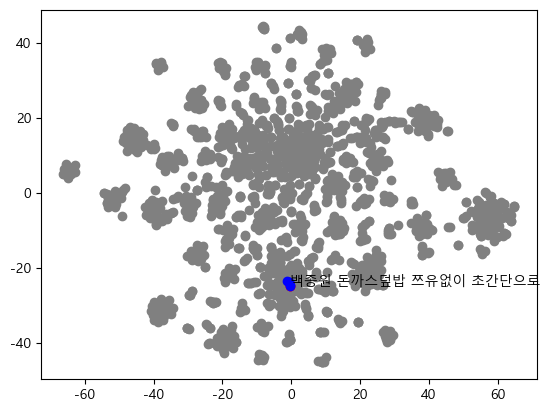

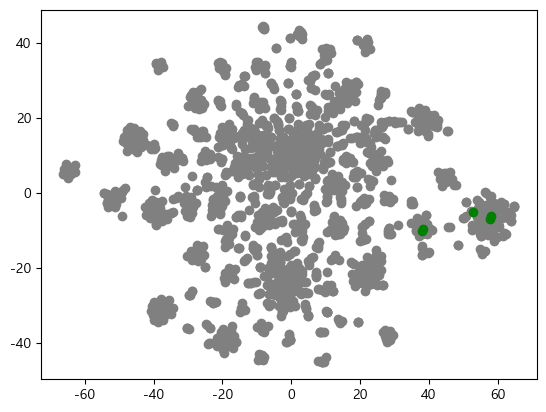

선택 음식 : 백종원 돈까스덮밥 쯔유없이 초간단으로 - 먹으면 안돼는 식재료 : 돼지고기


(['백종원 돈까스덮밥 쯔유없이 초간단으로',
  '치킨마요 - 남은 치킨 활용법 치킨덮밥',
  '초보주부요리하기) 부추호박전만들기!',
  '최고 간단한 쏘야! 소세지야채볶음 : 양념 세 가지로 휘리릭~',
  '상추 액젓 겉절이'],
 ['소세지 떡볶이 / 소떡 / 치즈 소떡',
  '애호박참치전',
  '매콤 순살치킨카레 만들기',
  '간단반찬 명란 감자볶음',
  '버섯전 미나리 표고버섯 듬뿍 넣고 만든 야채전'])

In [221]:
draw_recipe_recommend(matrix, 68, '돼지고기')

In [ ]:
백종원 돈까스덮밥 쯔유없이 초간단으로

In [212]:
matrix

,recipe_title,불닭소스,굴비,계란,열무김치,오이피클,전분,크래미,토마토케찹,삼겹살,...,계란노른자,냉동딸기,청고추,육수,갈비,두부,비트,강력분,다진홍고추,조선간장
0,호박 새우젓찌개 만드는 방법~★,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,깊은맛 나는 미역국 끓이는 방법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,잡채 쉽게 만드는 방법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,동래파전,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,청경채무침,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964,향긋한 미나리 무침,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965,간단하게 먹는 부추 겉절이,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,찜닭 이렇게하면 실패없는 요리 !,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
matrix.loc[matrix.recipe_title == '백종원 돈까스덮밥 쯔유없이 초간단으로']

,recipe_title,불닭소스,굴비,계란,열무김치,오이피클,전분,크래미,토마토케찹,삼겹살,...,계란노른자,냉동딸기,청고추,육수,갈비,두부,비트,강력분,다진홍고추,조선간장


In [202]:
matrix.loc[matrix['recipe_title'].str.contains('돈까스')]

,recipe_title,불닭소스,굴비,계란,열무김치,오이피클,전분,크래미,토마토케찹,삼겹살,...,계란노른자,냉동딸기,청고추,육수,갈비,두부,비트,강력분,다진홍고추,조선간장
68,백종원 돈까스덮밥 쯔유없이 초간단으로,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
867,돈까스김밥/돈까스/김밥/한끼식사/별미김밥/김밥꼬투리도 양보할수 없는 맛,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1083,[한그릇음식] 돈까스 김치나베 만들기,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1153,수제 돈까스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,매콤한 라면과 잘 어울리는 돈까스 라면 만들기,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1179,알렉스 튀겨나온 돈까스로 만들어본 돈까스 김치나베 레시피,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1322,경양식 돈까스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
draw_recipe_recommend(matrix, 4, '돼지고기')

In [3]:
def draw_TSNE(title, recipe_vec, n = 0):
    # recipe_vec 간의 유사도 구하기
    sim_recipe = cosine_similarity(rec_vec , rec_vec)
    # TSNE로 차원 축소하기
    tsne = TSNE(n_components= 2)
    reduced_vec = tsne.fit_transform(rec_vec)
    # 전체 점 찍기
    plt.scatter(reduced_vec[:, 0], reduced_vec[:, 1], c = 'grey')
    # 대상 레시피 빨간색으로 
    print(f"{title[n]}와 가장 가까운 레시피 5개 (코사인 유사도)")
    plt.annotate(title[n], reduced_vec[n], size = 10)
    plt.scatter(reduced_vec[n, 0], reduced_vec[n, 1], c= 'red')
    # 가장 가까운 5개 레시피 찾아서 초록색으로 표시
    def find_5idx(title_list, similarity, row_num = 0):
        similarity_pd = pd.DataFrame(similarity, columns=title)
        sim_list = similarity_pd.loc[row_num].sort_values(ascending= False)[1:6]
        idx = []
        for sim_title in list(sim_list.index) :
            idx.extend(list(title.index[title == sim_title]))
        return idx
    output = []
    print(find_5idx(title_list = title, similarity= sim_recipe, row_num = n))
    for i in find_5idx(title_list = title, similarity= sim_recipe, row_num = n):
        plt.scatter(reduced_vec[i, 0], reduced_vec[i, 1], c= 'blue')
        output.append(title[i])
    return output
draw_TSNE(rec_title, rec_vec, 2)

KeyboardInterrupt: 

In [ ]:
def draw_TSNE(title, recipe_vec, n = 0):
    # recipe_vec 간의 유사도 구하기
    sim_recipe = cosine_similarity(recipe_vec , recipe_vec)
    # TSNE로 차원 축소하기
    tsne = TSNE(n_components= 2)
    reduced_vec = tsne.fit_transform(recipe_vec)
    # 전체 점 찍기
    plt.scatter(reduced_vec[:, 0], reduced_vec[:, 1], c = 'grey')
    # 대상 레시피 빨간색으로 
    print(f"{title[n]}와 가장 가까운 레시피 5개 (코사인 유사도)")
    plt.annotate(title[n], reduced_vec[n], size = 10)
    plt.scatter(reduced_vec[n, 0], reduced_vec[n, 1], c= 'red')
    # 가장 가까운 5개 레시피 찾아서 초록색으로 표시
    def find_5idx(title_list, similarity, row_num = 0):
        similarity_pd = pd.DataFrame(similarity, columns=title)
        sim_list = similarity_pd.loc[row_num].sort_values(ascending= False)[1:6]
        idx = []
        for sim_title in list(sim_list.index) :
            idx.extend(list(title.index[title == sim_title]))
        return idx
    output = []
    print(find_5idx(title_list = title, similarity= sim_recipe, row_num = n))
    for i in find_5idx(title_list = title, similarity= sim_recipe, row_num = n):
        plt.scatter(reduced_vec[i, 0], reduced_vec[i, 1], c= 'blue')
        output.append(title[i])
    return output

깊은맛 나는 미역국 끓이는 방법와 가장 가까운 레시피 5개 (코사인 유사도)
[1836, 34, 1615, 1002, 1308]


['오뎅국 어묵국 끓이기 추운날 생각나는 음식',
 '백종원 순두부찌개 끓이는법 얼큰하니 좋다 ~',
 '집밥 백선생 무생채',
 '통닭구이 전기구이 마늘 올리브유 품은 통닭구이',
 '아삭아삭 오이무침 만들기']

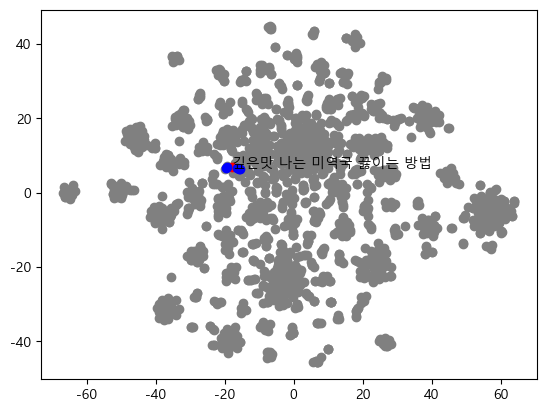

In [54]:
svd.draw_TSNE(rec_title, rec_vec, n = 1)

In [153]:

test = pd.DataFrame(rec_title)
test2 = test.dropna(how='any')
index = test2['recipe_title'].str.contains('돈까스')
test2[index]

,recipe_title
68,백종원 돈까스덮밥 쯔유없이 초간단으로
881,돈까스김밥/돈까스/김밥/한끼식사/별미김밥/김밥꼬투리도 양보할수 없는 맛
1099,[한그릇음식] 돈까스 김치나베 만들기
1171,수제 돈까스
1173,매콤한 라면과 잘 어울리는 돈까스 라면 만들기
1197,알렉스 튀겨나온 돈까스로 만들어본 돈까스 김치나베 레시피
1342,경양식 돈까스


In [75]:
index = test2['recipe_title'].str.contains('a')



KeyError: 'recipe_title'

In [55]:
'돈까스' in rec_title

False

In [146]:
rec_title.loc('돈까스' in rec_title)

In [85]:
ingd_list.index('삼겹살')

6

In [ ]:
rec_vec

In [ ]:
rec_vec

In [90]:
cosine_similarity([rec_vec[0]] , rec_vec)

array([[ 1.        ,  0.04828923,  0.02701912, ...,  0.01914891,
        -0.00607149, -0.03253024]])

In [124]:
rec_title, ingd_list, rec_vec, ingd_vec = svd.matrix_decomposition(matrix)
ingd_idx = ingd_list.index('삼겹살')
target_inge = ingd_vec[ingd_idx]
myfood = rec_vec[3] # 내가 원하는 음식의 벡터                          
myfood_new  = myfood - target_inge
sim = cosine_similarity([myfood_new], rec_vec)
recommend_idx = np.argsort(sim)[::-1]

2001개의 레시피, 632개의 식재료 -> 100차원으로 재표현 완료


In [123]:
sim[0]

array([-0.01579911,  0.08824616, -0.07280011, ...,  0.51525574,
       -0.04408534,  0.0417336 ])

In [140]:
matrix.columns

Index(['recipe_title', '불닭소스', '굴비', '계란', '열무김치', '오이피클', '전분', '크래미',
       '토마토케찹', '삼겹살',
       ...
       '계란노른자', '냉동딸기', '청고추', '육수', '갈비', '두부', '비트', '강력분', '다진홍고추', '조선간장'],
      dtype='object', length=995)

In [144]:
rec_title, ingd_list, rec_vec, ingd_vec = svd.matrix_decomposition(matrix)
import numpy as np
def draw_recipe_recommend(matrix, rec_num, ingd_name):


    # matrix : 2000 * 995 -> rec_vec = 2000*100, ingd_vec => 995*100
    rec_title, ingd_list, rec_vec, ingd_vec = svd.matrix_decomposition(matrix)

    ingd_idx = ingd_list.index(ingd_name) # 삼겹살 -> 삼겹살의 index

    target_inge = ingd_vec[ingd_idx]
    myfood = rec_vec[rec_num] # 내가 원하는 음식의 벡터                          
    myfood_new  = myfood - 0* target_inge

    sim = cosine_similarity([myfood_new], rec_vec)[0]
     # 차원 맞춰주기
    recommend_idx = np.argsort(sim)[::-1][:5]
    print(recommend_idx)
    recommend_list = [rec_title[i] for i in recommend_idx ]
    print(f"선택 음식 : {rec_title[rec_num]} - 먹으면 안돼는 식재료{ingd_name}")
    return recommend_list

rec_list = draw_recipe_recommend(matrix, 98, '~~정' , '당뇨')
print(rec_list)
    

2001개의 레시피, 632개의 식재료 -> 100차원으로 재표현 완료
2001개의 레시피, 632개의 식재료 -> 100차원으로 재표현 완료
[1429 1433  138 1469  780]
선택 음식 : 마늘종 베이컨 말이 마늘종 요리 폼나는요리 술안주 손님 초대요리 - 먹으면 안돼는 식재료마늘종


['밤만주 만들기', '블루베리 스콘', '바삭바삭한 비법을알려준닷[마가렛트]', '복숭아만주', '고구마 파운드케이크 만들기']

In [145]:
def draw_categoty_TSNE(title, recipe_vec, n = 0):
    # recipe_vec 간의 유사도 구하기
    sim_recipe = cosine_similarity(recipe_vec , recipe_vec)
    # TSNE로 차원 축소하기
    tsne = TSNE(n_components= 2)
    reduced_vec = tsne.fit_transform(recipe_vec)
    # 전체 점 찍기
    plt.scatter(reduced_vec[:, 0], reduced_vec[:, 1], c = 'grey')
    # 대상 레시피 빨간색으로 
    print(f"{title[n]}와 가장 가까운 레시피 5개 (코사인 유사도)")
    plt.annotate(title[n], reduced_vec[n], size = 10)
    plt.scatter(reduced_vec[n, 0], reduced_vec[n, 1], c= 'red')
    # 가장 가까운 5개 레시피 찾아서 초록색으로 표시
    def find_5idx(title_list, similarity, row_num = 0):
        similarity_pd = pd.DataFrame(similarity, columns=title)
        sim_list = similarity_pd.loc[row_num].sort_values(ascending= False)[1:6]
        idx = []
        for sim_title in list(sim_list.index) :
            idx.extend(list(title.index[title == sim_title]))
        return idx
    output = []
    print(find_5idx(title_list = title, similarity= sim_recipe, row_num = n))
    for i in find_5idx(title_list = title, similarity= sim_recipe, row_num = n):
        plt.scatter(reduced_vec[i, 0], reduced_vec[i, 1], c= 'blue')
        output.append(title[i])
    return output